# 2. Data Cleaning & EDA

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1 Data cleaning

In [2]:
# load passenger arrival data
arrival = pd.read_csv('../datasets/air_passenger_arrivals_by_region_country_of_embarkation.csv')

arrival

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 739,Unnamed: 740,Unnamed: 741,Unnamed: 742,Unnamed: 743,Unnamed: 744,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748
0,Theme: Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: Transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Air Transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Air Passenger Arrivals By Region/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data last updated: 24/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Source: CIVIL AVIATION AUTHORITY OF SINGAPORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number
9,Data Series,2023 Apr,2023 Mar,2023 Feb,2023 Jan,2022 Dec,2022 Nov,2022 Oct,2022 Sep,2022 Aug,...,1961 Oct,1961 Sep,1961 Aug,1961 Jul,1961 Jun,1961 May,1961 Apr,1961 Mar,1961 Feb,1961 Jan


In [3]:
# load passenger departure data
departure = pd.read_csv('../datasets/air_passenger_departures_by_region_country_of_disembarkation.csv')

departure

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 739,Unnamed: 740,Unnamed: 741,Unnamed: 742,Unnamed: 743,Unnamed: 744,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748
0,Theme: Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: Transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Air Transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Air Passenger Departures By Regio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data last updated: 24/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Source: CIVIL AVIATION AUTHORITY OF SINGAPORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number
9,Data Series,2023 Apr,2023 Mar,2023 Feb,2023 Jan,2022 Dec,2022 Nov,2022 Oct,2022 Sep,2022 Aug,...,1961 Oct,1961 Sep,1961 Aug,1961 Jul,1961 Jun,1961 May,1961 Apr,1961 Mar,1961 Feb,1961 Jan


### Reformatting of dataset

Both datasets comes in a similar format and requires reformatting in the following sequence:
1. Removal of unneccessary information (i.e., first 9 rows and last 19 rows which do not contain passenger numbers)
2. Tranpose the dataframe
3. Set the regions as column headers
4. Reset index

In [4]:
# define function to perform reformatting for both datasets
def reformat_df(df):
    df = df[9:-19] # step 1
    df = df.transpose() # step 2
    df.columns = df.iloc[0] # step 3
    df.reset_index(drop = True, inplace = True) # step 4a
    df.columns.name = None # step 4b
    return df

In [5]:
# reformat arrival df
arrive_df = reformat_df(arrival)

In [6]:
# reformat departure df
depart_df = reformat_df(departure)

### Review of columns in both dataframes

In [7]:
arrive_df.columns

Index(['Data Series', 'Number Of Air Passenger Arrivals', '  South East Asia',
       '    Indonesia', '    Malaysia', '    Philippines', '    Thailand',
       '    Vietnam', '  North East Asia', '    Mainland China',
       '    Hong Kong', '    Japan', '  South Asia', '  Middle East',
       '  Oceania', '  Europe', '    France', '    Germany',
       '    United Kingdom', '  North America', '  Other Regions'],
      dtype='object')

In [8]:
depart_df.columns

Index(['Data Series', 'Number Of Air Passenger Departures',
       '  South East Asia', '    Indonesia', '    Malaysia', '    Philippines',
       '    Thailand', '    Vietnam', '  North East Asia',
       '    Mainland China', '    Hong Kong', '    Japan', '  South Asia',
       '  Middle East', '  Oceania', '  Europe', '    France', '    Germany',
       '    United Kingdom', '  North America', '  Other Regions'],
      dtype='object')

Further cleaning of both datasets is required to obtain dataset that contains only the total passenger numbers (across all regions) and breakdown by regions for Changi Airport only:
1. Drop first row since it has been set as the column header
2. Reorder rows in chronological order starting from January 1961
3. Convert data type 'Data Series' column (which contains the month and year) to datetime format
4. Drop observations recorded prior to January 1989 (because only figures from January 1989 onwards are for Changi Airport alone)
5. Rename 'Data Series' column header as 'month'
6. Set 'Data Series' column as index
7. Convert columns to small cap and remove spaces
8. Drop all columns containing the breakdown of passenger numbers by country
9. Insert '_' where necessary to improve readability of column headers

In [9]:
def clean_df(df):
    df = df[1:].reset_index(drop = True) # step 1
    df = df.iloc[::-1].reset_index(drop = True) # step 2
    df['Data Series'] = pd.to_datetime(df['Data Series'], format='%Y %b ') # step 3a
    df['Data Series'] = df['Data Series'].dt.to_period('M') # step 3b
    df = df.drop(df.index[:336]) # step 4
    df.rename(columns={'Data Series': 'month'}, inplace = True) # step 5
    df.set_index('month', inplace = True) # step 6
    df.columns = df.columns.str.lower().str.replace(' ', '') # step 7
    col_to_drop = ['indonesia','malaysia','philippines','thailand','vietnam','mainlandchina','hongkong','japan','france','germany','unitedkingdom'] # step 8a
    df = df.drop(columns = col_to_drop) # step 8b
    rename_col = {'numberofairpassengerarrivals': 'no_of_air_passenger_arrivals',
                  'numberofairpassengerdepartures': 'no_of_air_passenger_departures',
                  'southeastasia': 'south_east_asia',
                  'northeastasia': 'north_east_asia',
                  'southasia': 'south_asia',
                  'middleeast': 'middle_east',
                  'northamerica': 'north_america',
                  'otherregions': 'other_regions'} # step 9a
    df = df.rename(columns = rename_col) # step 9b
    return df

In [10]:
# clean arrival df
arrive_df_final = clean_df(arrive_df)

In [11]:
# clean departure df
depart_df_final = clean_df(depart_df)

### Missing values

As mentioned in the footnote of the dataset, the data could include na values which indicates that the observation for that particular month is not available or not applicable. The presence of na values would be checked in the following cells.

#### Arrival passenger dataset

In [12]:
# check for na values
arrive_df_final.applymap(lambda x: x == 'na').any()

no_of_air_passenger_arrivals    False
south_east_asia                 False
north_east_asia                 False
south_asia                      False
middle_east                     False
oceania                         False
europe                          False
north_america                   False
other_regions                    True
dtype: bool

In [13]:
# check for months in which na values are found
arrive_df_final.applymap(lambda x: x == 'na').head(290)

,no_of_air_passenger_arrivals,south_east_asia,north_east_asia,south_asia,middle_east,oceania,europe,north_america,other_regions
month,,,,,,,,,
1989-01,False,False,False,False,False,False,False,False,True
1989-02,False,False,False,False,False,False,False,False,True
1989-03,False,False,False,False,False,False,False,False,True
1989-04,False,False,False,False,False,False,False,False,True
1989-05,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
2012-10,False,False,False,False,False,False,False,False,True
2012-11,False,False,False,False,False,False,False,False,True
2012-12,False,False,False,False,False,False,False,False,True


Based on the above cells, it is observed that the na values appears only in the breakdown of passenger numbers under "Other Regions" and they are found in the years from 1989 through 2012. Thus, it may be concluded that there are no flights arriving from or departing to the countries in the region in those months. Thus, the na values can be treated as 0. In this case, the na values shall be imputed with 0.

In [14]:
# replace na values with 0
arrive_df_final = arrive_df_final.replace('na', 0)

In [15]:
# verify imputation
arrive_df_final.applymap(lambda x: x == 'na').any()

no_of_air_passenger_arrivals    False
south_east_asia                 False
north_east_asia                 False
south_asia                      False
middle_east                     False
oceania                         False
europe                          False
north_america                   False
other_regions                   False
dtype: bool

#### Departure passenger dataset

In [16]:
# check for na values in departure df
depart_df_final.applymap(lambda x: x == 'na').any()

no_of_air_passenger_departures    False
south_east_asia                   False
north_east_asia                   False
south_asia                        False
middle_east                       False
oceania                           False
europe                            False
north_america                     False
other_regions                      True
dtype: bool

In [17]:
# check for months in which na values are found
depart_df_final.applymap(lambda x: x == 'na').head(290)

,no_of_air_passenger_departures,south_east_asia,north_east_asia,south_asia,middle_east,oceania,europe,north_america,other_regions
month,,,,,,,,,
1989-01,False,False,False,False,False,False,False,False,True
1989-02,False,False,False,False,False,False,False,False,True
1989-03,False,False,False,False,False,False,False,False,True
1989-04,False,False,False,False,False,False,False,False,True
1989-05,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
2012-10,False,False,False,False,False,False,False,False,True
2012-11,False,False,False,False,False,False,False,False,True
2012-12,False,False,False,False,False,False,False,False,True


A similar observation for na values can be seen in the departure dataset as well and thus, the na values shall also be imputed with 0 here.

In [18]:
# replace na values with 0
depart_df_final = depart_df_final.replace('na', 0)

In [19]:
# verify imputation
depart_df_final.applymap(lambda x: x == 'na').any()

no_of_air_passenger_departures    False
south_east_asia                   False
north_east_asia                   False
south_asia                        False
middle_east                       False
oceania                           False
europe                            False
north_america                     False
other_regions                     False
dtype: bool

### Check data type

In [20]:
# passenger arrival df
arrive_df_final.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 412 entries, 1989-01 to 2023-04
Freq: M
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   no_of_air_passenger_arrivals  412 non-null    object
 1   south_east_asia               412 non-null    object
 2   north_east_asia               412 non-null    object
 3   south_asia                    412 non-null    object
 4   middle_east                   412 non-null    object
 5   oceania                       412 non-null    object
 6   europe                        412 non-null    object
 7   north_america                 412 non-null    object
 8   other_regions                 412 non-null    object
dtypes: object(9)
memory usage: 32.2+ KB


In [21]:
# convert to int dtype
arrive_df_final = arrive_df_final.astype(int)

In [22]:
# passenger departure df
depart_df_final.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 412 entries, 1989-01 to 2023-04
Freq: M
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   no_of_air_passenger_departures  412 non-null    object
 1   south_east_asia                 412 non-null    object
 2   north_east_asia                 412 non-null    object
 3   south_asia                      412 non-null    object
 4   middle_east                     412 non-null    object
 5   oceania                         412 non-null    object
 6   europe                          412 non-null    object
 7   north_america                   412 non-null    object
 8   other_regions                   412 non-null    object
dtypes: object(9)
memory usage: 32.2+ KB


In [23]:
# convert to int dtype
depart_df_final = depart_df_final.astype(int)

## 2.2 EDA

### Summary statistics

In [24]:
# set display option to remove scientific notation
pd.set_option('display.float_format', lambda x: f'{x:.6f}')

# passenger arrival df
arrive_df_final.describe()

,no_of_air_passenger_arrivals,south_east_asia,north_east_asia,south_asia,middle_east,oceania,europe,north_america,other_regions
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1378314.291262,586114.223301,335512.250000,113451.516990,27705.786408,154436.165049,127833.983010,24180.053398,2154.177184
std,726796.418763,320693.348275,192887.732834,76491.636633,23230.730989,76125.928851,51134.526523,10381.655231,3888.804190
min,3976.000000,1102.000000,826.000000,705.000000,90.000000,370.000000,452.000000,275.000000,0.000000
25%,889906.250000,384868.750000,207226.250000,50201.750000,9765.500000,87107.000000,89238.500000,18443.750000,0.000000
50%,1188065.000000,469517.500000,285431.500000,86720.500000,17179.000000,160464.000000,135578.500000,23540.500000,0.000000
75%,1977138.500000,862563.250000,470429.500000,171585.000000,42820.250000,211724.000000,164641.250000,29931.250000,1104.500000
max,3231750.000000,1354850.000000,814848.000000,301249.000000,100572.000000,368006.000000,253404.000000,63365.000000,15405.000000


In [25]:
# passenger departure df
depart_df_final.describe()

,no_of_air_passenger_departures,south_east_asia,north_east_asia,south_asia,middle_east,oceania,europe,north_america,other_regions
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1368574.436893,573570.898058,335149.500000,109593.291262,27521.354369,160635.410194,127988.750000,24860.660194,2176.871359
std,715479.291422,315518.255560,191462.072535,73712.918519,23209.264952,78096.179046,50040.384297,10225.009521,3923.799006
min,17340.000000,4801.000000,7341.000000,195.000000,271.000000,507.000000,2335.000000,294.000000,0.000000
25%,885795.250000,369121.750000,207059.500000,45769.000000,9344.250000,94859.750000,89664.500000,18667.500000,0.000000
50%,1173820.000000,455271.500000,287552.000000,83641.000000,16346.500000,164966.000000,137774.000000,24973.500000,0.000000
75%,1962325.500000,844314.750000,462929.000000,164058.000000,44086.750000,218004.500000,163371.250000,30356.000000,1032.000000
max,3132828.000000,1352214.000000,814406.000000,313760.000000,91493.000000,364406.000000,243809.000000,62427.000000,15299.000000


### Outlier analysis

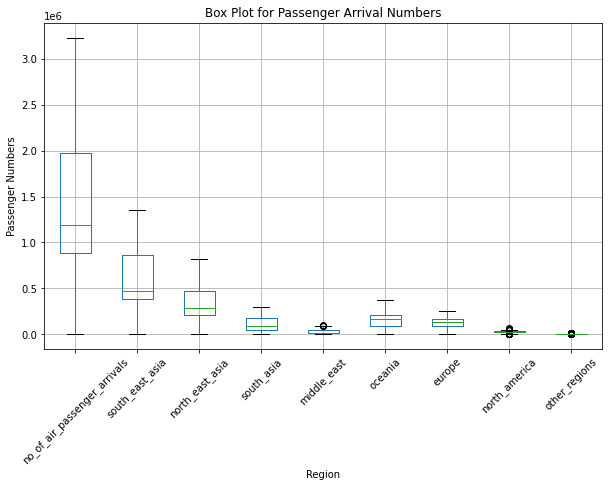

In [26]:
# plot box plots for passenger arrivals
plt.figure(figsize = (10, 6))
arrive_df_final.boxplot()

# tilt x-axis labels
plt.xticks(rotation = 45)

# title and labels
plt.title('Box Plot for Passenger Arrival Numbers')
plt.xlabel('Region')
plt.ylabel('Passenger Numbers')

# show plot
plt.show()

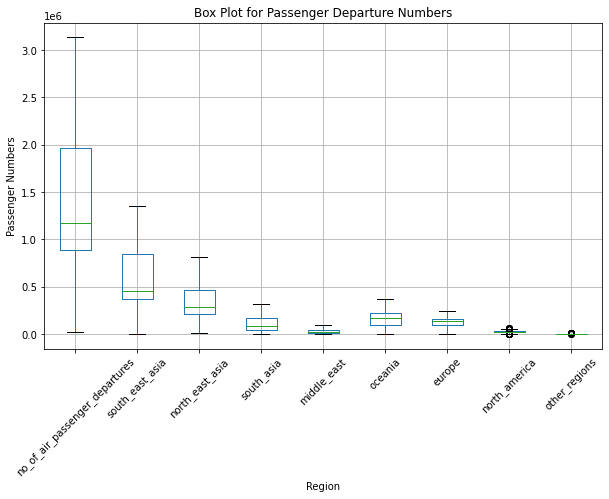

In [27]:
# plot box plots for passenger departures
plt.figure(figsize = (10, 6))
depart_df_final.boxplot()

# tilt x-axis labels
plt.xticks(rotation = 45)

# title and labels
plt.title('Box Plot for Passenger Departure Numbers')
plt.xlabel('Region')
plt.ylabel('Passenger Numbers')

# show plot
plt.show()

**Insights:**

From the box plots for both passenger arrival and departure, the passenger traffic is on the higher side for the regions of Southeast Asia and Northeast Asia as compared to the traffic for the remaining regions (by referencing to the mean passenger numbers for each region). This could be due to the fact that Singapore is one of the major aviation hubs for flights in Asia and is strategically located in Southeast Asia which makes it an ideal transit point for flights not only between Europe and Oceania but also between destinations within Asia.

The box plots also identified some outliers in the regions of Middle East, North America and Other Regions. However, it may not be suitable to remove outliers here as passenger traffic in general is dependent on various external factors such as travel visa requirements, government regulations, occurence of natural disasters and disease outbreak. Thus, it is important to retain the outliers to further analyse potential causes of the outlier observations.

### Examination of distributions

#### Passenger traffic in the past decades 

In [28]:
# convert the Period index to Timestamp (datetime) index
arrive_df_final.index = arrive_df_final.index.to_timestamp()
depart_df_final.index = depart_df_final.index.to_timestamp()

i. Total passenger traffic (across all regions)

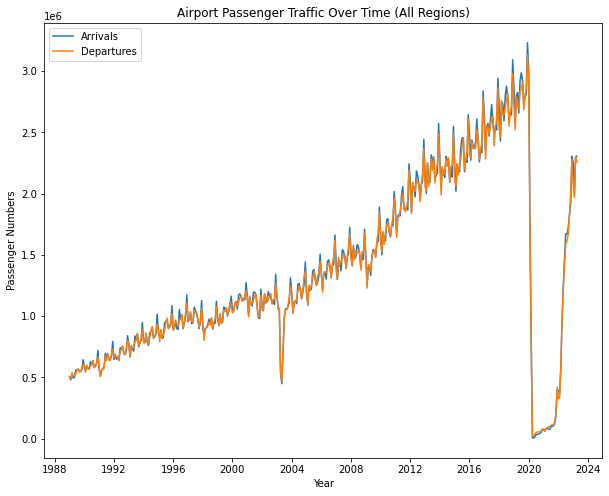

In [56]:
# set figure size and create subplot
plt.figure(figsize = (10, 8))
ax = plt.subplot()

# plot the arrival data
sns.lineplot(data = arrive_df_final, x = arrive_df_final.index, y = 'no_of_air_passenger_arrivals', label = 'Arrivals', ax = ax)

# plot the departure data
sns.lineplot(data = depart_df_final, x = depart_df_final.index, y = 'no_of_air_passenger_departures', label = 'Departures', ax = ax)

# title and labels
plt.title('Airport Passenger Traffic Over Time (All Regions)')
plt.xlabel('Year')
plt.ylabel('Passenger Numbers')

# legend
plt.legend()

# show plot
plt.show()

**Insights**:

When aggregating across all regions, there is a general increasing trend across the past decades for both arrival and departure passenger traffic. The fluctuation pattern of the arrival passenger traffic also mirrors that of the departure passenger traffic. Notably, there are two sharp and significant drops in the passenger traffic:
1. Around 2003 to 2004, due to the SARS outbreak; and
2. Around 2020 to 2021, due to the COVID-19 outbreak.

However, the differences between these two drops lie in the extent of drop and the rate of recovery. We observe that the travel demand drop is less drastic and the speed of recovery is higher during the SARS outbreak as compared to the COVID-19 outbreak. This may be due to the fact that while both SARS and COVID-19 originated from the same family of virus, it was much easier to limit the spread of SARS by isolating symptomatic patients promptly since it is most transmissible when they are sick. In contrast, COVID-19 has been much more challenging to control due to its greater ease of transmission [[1]](https://theconversation.com/the-original-sars-virus-disappeared-heres-why-coronavirus-wont-do-the-same-138177).

ii. Passenger traffic (Southeast Asia, Northeast Asia, South Asia & Middle East)

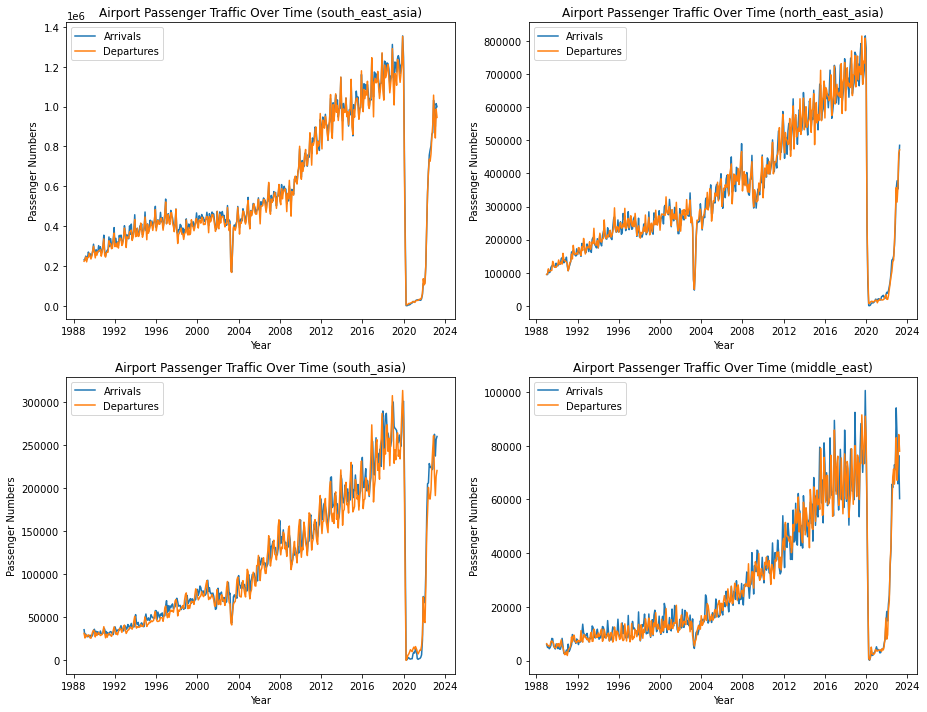

In [57]:
# define regions
regions = ['south_east_asia','north_east_asia','south_asia','middle_east']

# set figure size and create subplot
plt.figure(figsize=(13, 10))

# loop through each region and create a line chart for arrivals and departures
for region in regions:
    ax = plt.subplot(2, 2, regions.index(region) + 1)
    sns.lineplot(data=arrive_df_final, x=arrive_df_final.index, y=region, label='Arrivals', ax=ax)
    sns.lineplot(data=depart_df_final, x=depart_df_final.index, y=region, label='Departures', ax=ax)

    # title and labels
    plt.title(f'Airport Passenger Traffic Over Time ({region})')
    plt.xlabel('Year')
    plt.ylabel('Passenger Numbers')

    # legend
    plt.legend()

# adjust layout
plt.tight_layout()

# show plot
plt.show()

iii. Passenger traffic (Oceania, Europe, North America & Other Regions)

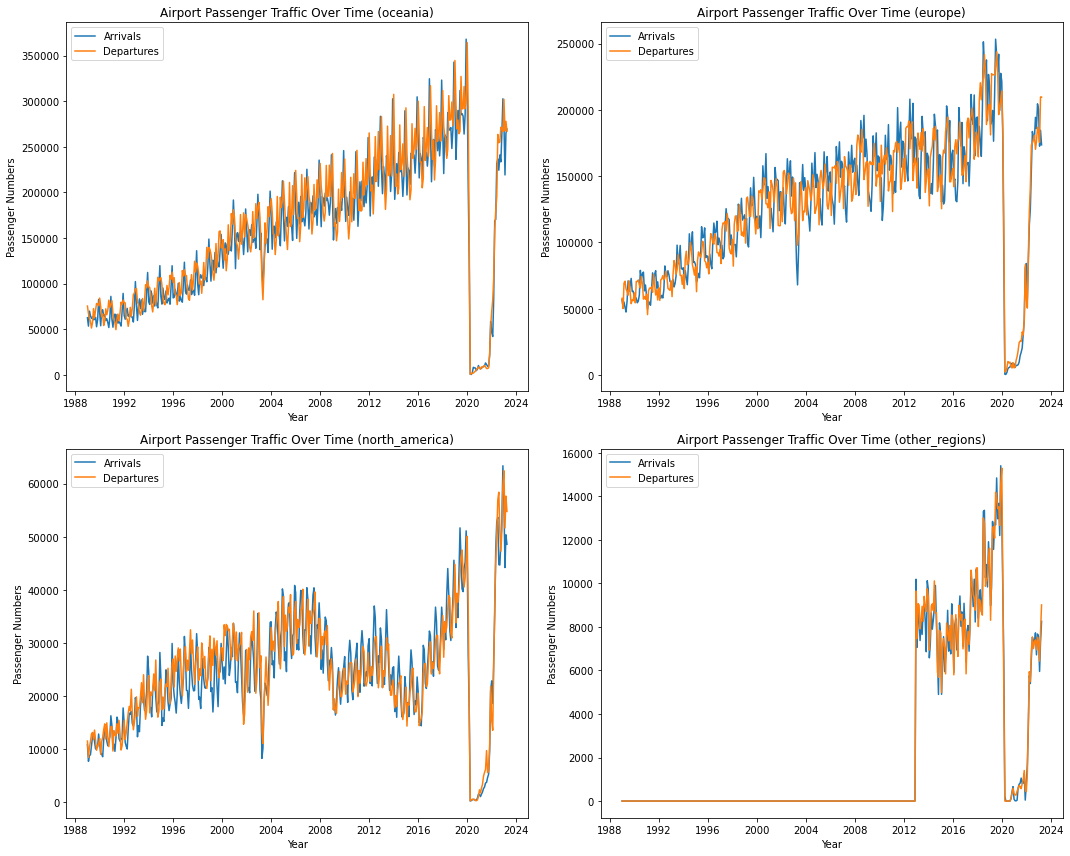

In [58]:
# define regions
regions = ['oceania','europe','north_america','other_regions']

# set figure size and create subplot
plt.figure(figsize=(15, 12))

# loop through each region and create a line chart for arrivals and departures
for region in regions:
    ax = plt.subplot(2, 2, regions.index(region) + 1)
    sns.lineplot(data=arrive_df_final, x=arrive_df_final.index, y=region, label='Arrivals', ax=ax)
    sns.lineplot(data=depart_df_final, x=depart_df_final.index, y=region, label='Departures', ax=ax)

    # title and labels
    plt.title(f'Airport Passenger Traffic Over Time ({region})')
    plt.xlabel('Year')
    plt.ylabel('Passenger Numbers')

    # legend
    plt.legend()

# adjust layout
plt.tight_layout()

# show plot
plt.show()

**Insights:**

Through the breakdown of passenger traffic based on regions, there remains a general increasing trend across the past decades for both arrival and departure passenger traffic (excluding other regions as there were no observations recorded till the early 2010s). However, we also note that there are unique drops in the travel demand for the North America region between the period of:
- 2001 to 2003, due to the September 11 attacks; and
- 2008 to 2009, due to the economic recession in 2008.
Both of the above which have impacted air travel demand negatively across the globe but seem to have a deeper impact on travels to and from the North America region as compared to the other regions.

A similar fluctuation pattern within each year across all regions can also be observed and the monthly fluctuation would be further investigated in the following segment. 

#### Monthly average passenger traffic

i. Monthly average passenger traffic (across all regions)

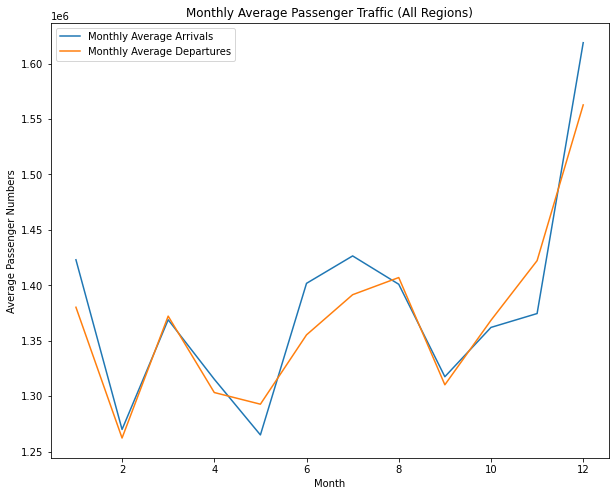

In [32]:
# group the data by month and calculate the average for each month
ave_arrive_total = arrive_df_final['no_of_air_passenger_arrivals'].groupby(arrive_df_final.index.month).mean()
ave_depart_total = depart_df_final['no_of_air_passenger_departures'].groupby(depart_df_final.index.month).mean()

# set figure size and create subplot
plt.figure(figsize = (10, 8))
ax = plt.subplot()

# plot the arrival data
sns.lineplot(data = ave_arrive_total, x = ave_arrive_total.index, y = ave_arrive_total.values, label = 'Monthly Average Arrivals', ax = ax)

# plot the departure data
sns.lineplot(data = ave_depart_total, x = ave_depart_total.index, y = ave_depart_total.values, label = 'Monthly Average Departures', ax = ax)

# customize the plot
plt.title('Monthly Average Passenger Traffic (All Regions)')
plt.xlabel('Month')
plt.ylabel('Average Passenger Numbers')

# show the plot
plt.show()

**Insights**:

Looking across the year, there is a general increasing trend in passenger numbers for both arrivals and departures, indicating an increasing air travel demand. There are three distinct peaks observed:
1. January, possibility due to trailing demand from previous year end travel demand;
2. June to August, due to Singapore school holiday, US and Europe summer break; and
3. December, due to year-end holiday travels (i.e., Singapore school holiday, leave clearance-induced travels for working adults)

ii. Monthly average passenger traffic (Southeast Asia, Northeast Asia, South Asia & Middle East)

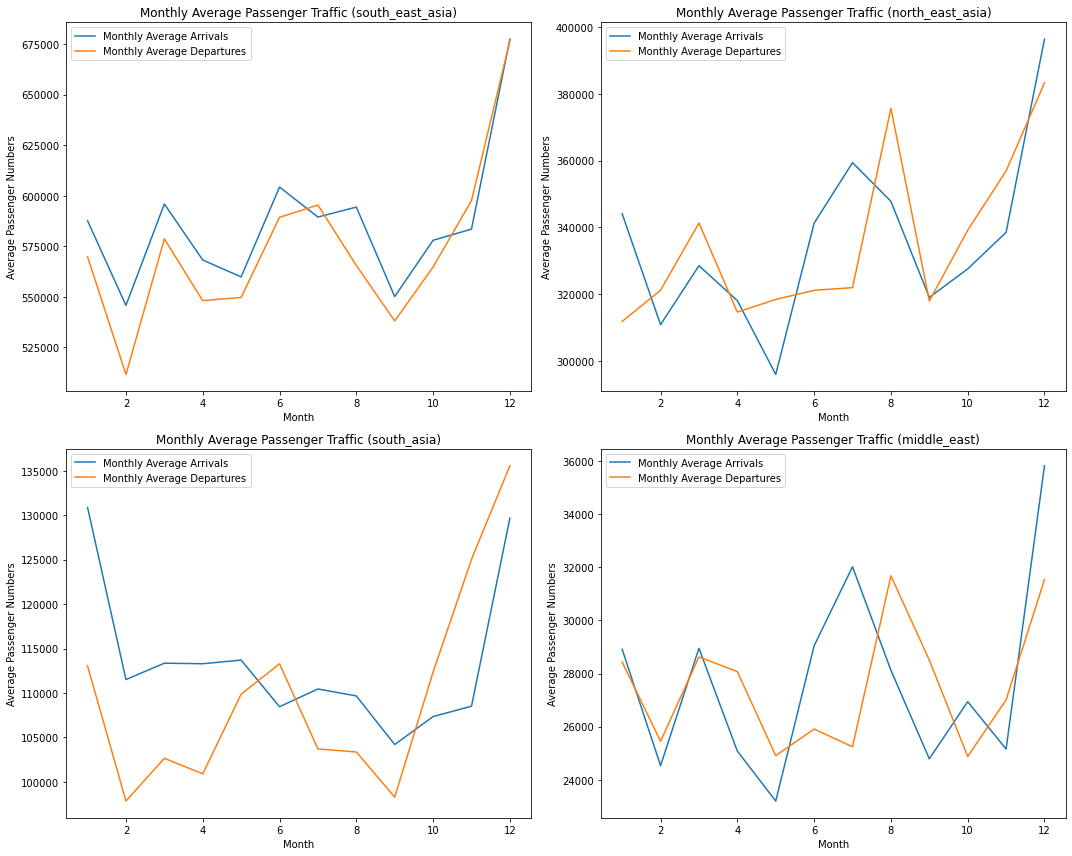

In [33]:
# define the regions
regions = ['south_east_asia','north_east_asia','south_asia','middle_east']

# set figure size and create subplot
plt.figure(figsize=(15, 12))

# loop through each region and create line chart for arrivals and departures
for region in regions:
    # group data by month and calculate the average for each month
    ave_arrive = arrive_df_final[region].groupby(arrive_df_final.index.month).mean()
    ave_depart = depart_df_final[region].groupby(depart_df_final.index.month).mean()

    ax = plt.subplot(2, 2, regions.index(region) + 1)
    sns.lineplot(data=ave_arrive, x=ave_arrive.index, y=ave_arrive.values, label='Monthly Average Arrivals', ax=ax)
    sns.lineplot(data=ave_depart, x=ave_depart.index, y=ave_depart.values, label='Monthly Average Departures', ax=ax)

    # title and labels
    plt.title(f'Monthly Average Passenger Traffic ({region})')
    plt.xlabel('Month')
    plt.ylabel('Average Passenger Numbers')

    # legend
    plt.legend()

# adjust layout
plt.tight_layout()

# show plot
plt.show()

iii. Monthly average passenger traffic (Oceania, Europe, North America & Other Regions)

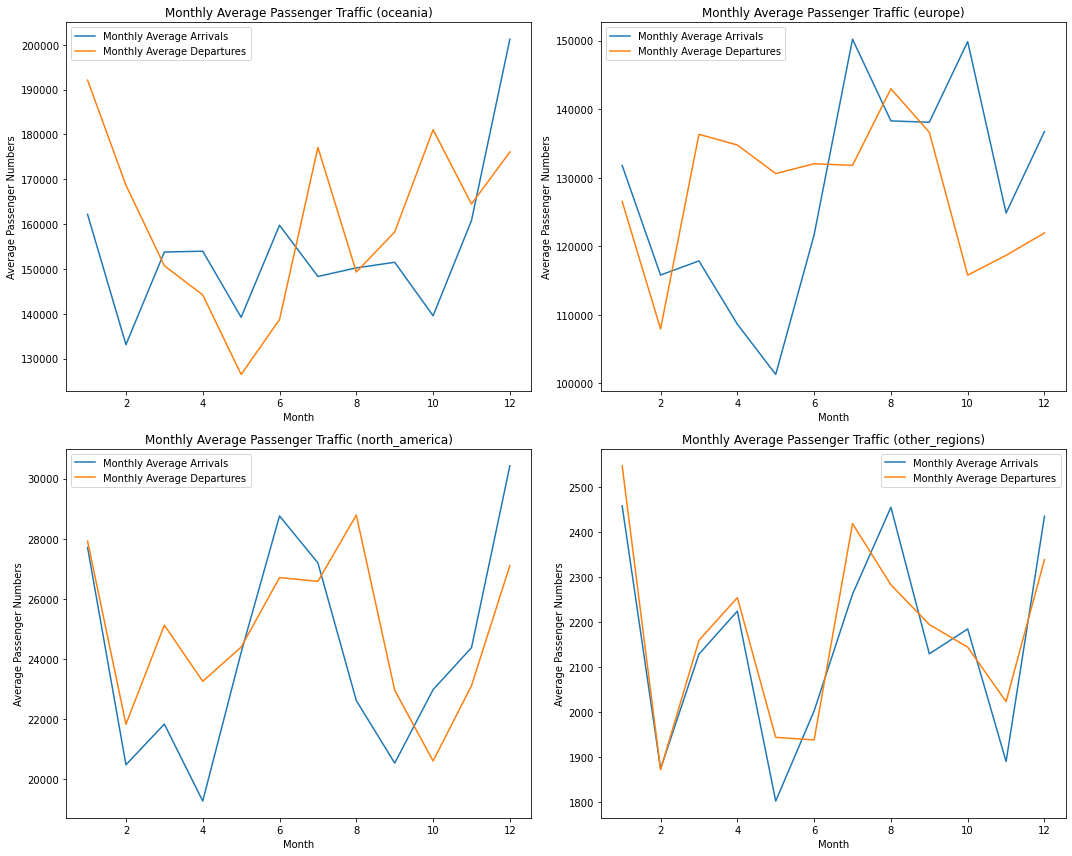

In [34]:
# define the regions
regions = ['oceania','europe','north_america','other_regions']

# set figure size and create subplot
plt.figure(figsize=(15, 12))

# loop through each region and create line chart for arrivals and departures
for region in regions:
    # group data by month and calculate the average for each month
    ave_arrive = arrive_df_final[region].groupby(arrive_df_final.index.month).mean()
    ave_depart = depart_df_final[region].groupby(depart_df_final.index.month).mean()

    ax = plt.subplot(2, 2, regions.index(region) + 1)
    sns.lineplot(data=ave_arrive, x=ave_arrive.index, y=ave_arrive.values, label='Monthly Average Arrivals', ax=ax)
    sns.lineplot(data=ave_depart, x=ave_depart.index, y=ave_depart.values, label='Monthly Average Departures', ax=ax)

    # title and labels
    plt.title(f'Monthly Average Passenger Traffic ({region})')
    plt.xlabel('Month')
    plt.ylabel('Average Passenger Numbers')

    # legend
    plt.legend()

# adjust layout
plt.tight_layout()

# show plot
plt.show()

**Insights:**

By breaking down the monthly average passenger traffic by region, it becomes apparent that the fluctuation patterns are different for each region but the peak travel period remains in the year end and towards the last quarter of the calendar year. The differences in travel demand to different regions across the months could be attributed not only to the destination's seasonal variations but could also be influenced by various external factors such as economic factors, special events and festivals, media coverage, exchange rates and social / cultural factors. Thus in this case, it may be challenging to conclude on the key factor that leads to the increase in air travel demand to the respective regions especially since there are no detailed breakdown on the passenger traffic for each country in the region.

## 2.4 Inclusion of transit passenger traffic data

As covered in the earlier Section 1.3 on Data Source (under Project Overview), transit passenger traffic numbers are not included in the datasets. Thus, the data on transit passenger are sourced for separately.

In [35]:
# load transit passenger data
transit = pd.read_csv('../datasets/air_passenger_transit.csv')

transit

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 511,Unnamed: 512,Unnamed: 513,Unnamed: 514,Unnamed: 515,Unnamed: 516,Unnamed: 517,Unnamed: 518,Unnamed: 519,Unnamed: 520
0,Theme: Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: Transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Air Transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Civil Aircraft Arrivals And Depar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data last updated: 28/06/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Source: CIVIL AVIATION AUTHORITY OF SINGAPORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Data Series,2023 Apr,2023 Mar,2023 Feb,2023 Jan,2022 Dec,2022 Nov,2022 Oct,2022 Sep,2022 Aug,...,1980 Oct,1980 Sep,1980 Aug,1980 Jul,1980 Jun,1980 May,1980 Apr,1980 Mar,1980 Feb,1980 Jan
9,Total Passengers (Number),4603335,4633939,4002734,4366912,4620193,3963295,3687774,3421600,3319381,...,611995,585076,684907,618380,594860,587003,561218,597644,552263,566879


### Cleaning and formatting

The dataset requires reformatting in the following sequence:
1. Removal of unneccessary information (i.e., first 8 rows and last 12 rows which do not contain passenger numbers)
2. Tranpose the dataframe
3. Set the row labels as column headers
4. Reset index
5. Drop first row since it has been set as the column header
6. Reorder rows in chronological order starting from January 1961
7. Convert data type 'Data Series' column (which contains the month and year) to datetime format
8. Drop observations recorded prior to January 1989 (because only figures from January 1989 onwards are for Changi Airport alone)
9. Rename 'Data Series' column header as 'month'
10. Set 'Data Series' column as index
11. Convert columns to small cap and remove spaces
12. Insert '_' where necessary to improve readability of column headers

In [36]:
# define function to perform cleaning and reformatting
def reformat_transit_df(df):
    df = df.iloc[8:11] # step 1
    df = df.transpose() # step 2
    df.columns = df.iloc[0] # step 3
    df.reset_index(drop = True, inplace = True) # step 4a
    df.columns.name = None # step 4b
    df = df[1:].reset_index(drop = True) # step 5
    df = df.iloc[::-1].reset_index(drop = True) # step 6
    df['Data Series'] = pd.to_datetime(df['Data Series'], format='%Y %b ') # step 7a
    df['Data Series'] = df['Data Series'].dt.to_period('M') # step 7b
    df = df.iloc[108:] # step 8
    df.rename(columns={'Data Series': 'month'}, inplace = True) # step 9
    df.set_index('month', inplace = True) # step 10
    df.columns = df.columns.str.lower().str.replace(' ', '') # step 11
    rename_col = {'totalpassengers(number)': 'total_passengers','passengersintransit(number)': 'no_of_air_passenger_transit'} # step 12a
    df = df.rename(columns = rename_col) # step 12b
    return df

In [37]:
transit_final = reformat_transit_df(transit)

#### Missing values

In [38]:
# check for na values
transit_final.applymap(lambda x: x == 'na').any()

total_passengers               False
no_of_air_passenger_transit    False
dtype: bool

#### Check data type

In [39]:
transit_final.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 412 entries, 1989-01 to 2023-04
Freq: M
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   total_passengers             412 non-null    object
 1   no_of_air_passenger_transit  412 non-null    object
dtypes: object(2)
memory usage: 9.7+ KB


In [40]:
# convert to int dtype
transit_final = transit_final.astype(int)

### EDA

#### Summary statistics

In [41]:
transit_final.describe()

,total_passengers,no_of_air_passenger_transit
count,412.000000,412.000000
mean,2841719.548544,94830.820388
std,1434729.077665,39278.045621
min,24504.000000,17.000000
25%,1892407.750000,67930.750000
50%,2488917.500000,102672.000000
75%,4005006.250000,122530.750000
max,6414495.000000,168873.000000


#### Outlier analysis

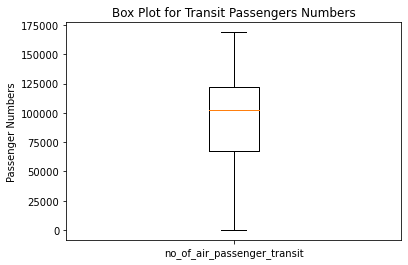

In [42]:
plt.figure(figsize = (6, 4))

# create box plot
plt.boxplot(transit_final['no_of_air_passenger_transit'])

# title and labels
plt.title('Box Plot for Transit Passengers Numbers')
plt.xticks([1], ['no_of_air_passenger_transit'])
plt.ylabel('Passenger Numbers')

# show plot
plt.show()

**Insights:**

The mean transit passenger traffic is at about 100,000 whereas the mean total passenger traffic (inclusive of arrival, departure and transit passengers) is at about 2.8 million, which indicates that the proportion of transit passenger accounts for only a small proportion of the total passenger traffic (i.e., about 3.5%). Based on the above box plot, there are also no outliers identified.

#### Examination of distributions

In [43]:
# convert the Period index to Timestamp (datetime) index
transit_final.index = transit_final.index.to_timestamp()

i. Transit passenger traffic in the past decades

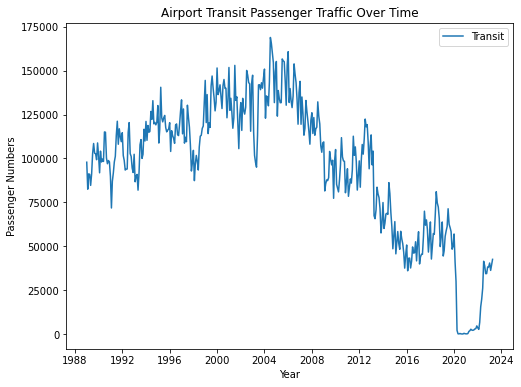

In [59]:
# set figure size and create subplot
plt.figure(figsize = (8, 6))

# plot the transit data
sns.lineplot(data = transit_final, x = transit_final.index, y = 'no_of_air_passenger_transit', label = 'Transit')

# title and labels
plt.title('Airport Transit Passenger Traffic Over Time')
plt.xlabel('Year')
plt.ylabel('Passenger Numbers')

# legend
plt.legend()

# show plot
plt.show()

**Insights:**

In contrast to the arrival and departure traffic, the transit traffic experienced a general increasing trend in the earlier decades of airport operations before peaking around 2005 to 2006. Beyond the peak, the transit traffic then experienced a decreasing trend before dropping drastically in 2020 due to the drop in air travel demand associated with the COVID-19 outbreak. The decreasing transit traffic may be due to the increase in competition from other neighbouring airports such as Pudong and Hong Kong airport in China, Narita airport in Japan and Incheon airport in South Korea [[3]](https://www.sciencedirect.com/science/article/pii/S2092521217300639).

ii. Monthly average transit passenger traffic

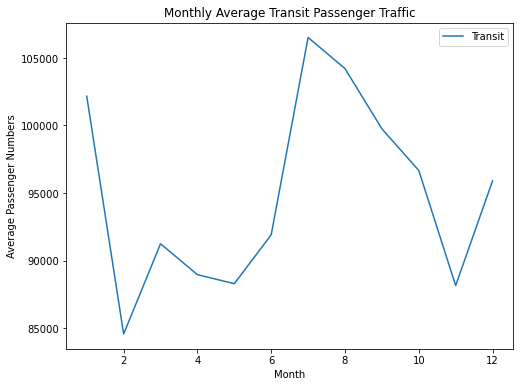

In [45]:
# group the data by month and calculate the average for each month
ave_transit = transit_final['no_of_air_passenger_transit'].groupby(transit_final.index.month).mean()

# set figure size and create subplot
plt.figure(figsize = (8, 6))

# plot the arrival data
sns.lineplot(data = ave_transit, x = ave_transit.index, y = ave_transit.values, label = 'Transit')

# title and labels
plt.title('Monthly Average Transit Passenger Traffic')
plt.xlabel('Month')
plt.ylabel('Average Passenger Numbers')

# show the plot
plt.show()

**Insights:**

Transit traffic fluctuates over the months but only aligns with the arrival and departure traffic in terms of higher traffic in January and July / August periods.

## 2.5 Addressing problem statement with collected data

The data that have been collected thus far consists of all possible sources of air travel passengers (i.e., arrival, departure and transit and thus, the problem statement can be addressed through the use and analysis of the data collected. To facilitate further analysis and modeling, the earlier datasets on arrival, departure and transit passenger traffic would be combined into a single dataframe by consolidating the following:
1. Total number of air travel passengers (arrival, departure and transit)
2. Total number of air travel passengers for the respective regions (arrival and departure)

In [46]:
# drop first column in arrival and departure df
arrive_df_final_dropped = arrive_df_final.drop(arrive_df_final.columns[0], axis = 1)
depart_df_final_dropped = depart_df_final.drop(depart_df_final.columns[0], axis = 1)

# sum arrival and departure passenger numbers
arrive_n_depart = arrive_df_final_dropped.add(depart_df_final_dropped)

In [47]:
# drop transit passenger numbers
transit_final_dropped = transit_final.drop(transit_final.columns[1], axis = 1)

In [48]:
# merge all datasets together
passenger_traffic = pd.merge(transit_final_dropped, arrive_n_depart, on = 'month')

In [61]:
# display statistics of combined df
passenger_traffic.describe()

,total_passengers
count,412.000000
mean,2841719.548544
std,1434729.077665
min,24504.000000
25%,1892407.750000
50%,2488917.500000
75%,4005006.250000
max,6414495.000000


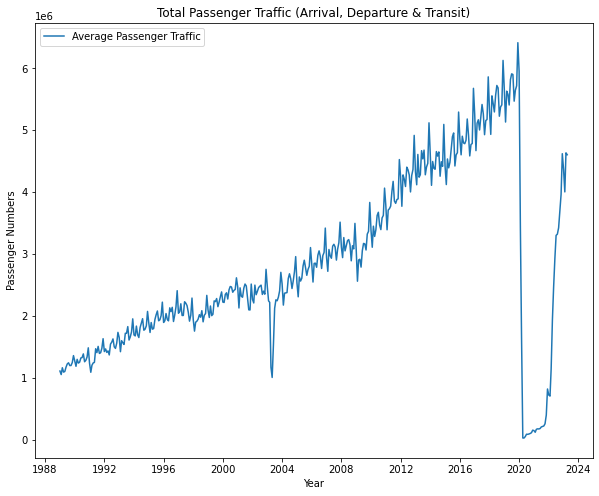

In [60]:
# set figure size and create subplot
plt.figure(figsize = (10, 8))

# plot the arrival data
sns.lineplot(data = passenger_traffic['total_passengers'], x = passenger_traffic.index, y = passenger_traffic['total_passengers'].values, label = 'Average Passenger Traffic')

# title and labels
plt.title('Total Passenger Traffic (Arrival, Departure & Transit)')
plt.xlabel('Year')
plt.ylabel('Passenger Numbers')

# show the plot
plt.show()

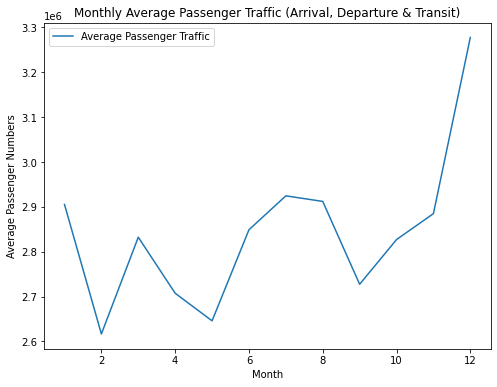

In [50]:
# group the data by month and calculate the average for each month
monthly_ave = passenger_traffic['total_passengers'].groupby(passenger_traffic.index.month).mean()

# set figure size and create subplot
plt.figure(figsize = (8, 6))

# plot the arrival data
sns.lineplot(data = monthly_ave, x = monthly_ave.index, y = monthly_ave.values, label = 'Average Passenger Traffic')

# title and labels
plt.title('Monthly Average Passenger Traffic (Arrival, Departure & Transit)')
plt.xlabel('Month')
plt.ylabel('Average Passenger Numbers')

# show the plot
plt.show()

**Insights:**

After the summation of the transit numbers with the arrival and departure numbers, the numbers are visualised in a similar manner as what was done earlier. It is observed that both plots exhibit a similar pattern with the earlier plots for arrival and departure numbers. While this may indicate that the fluctuations in transit numbers follow that of the arrival and departure numbers, we can see from the summary statistics that the mean for transit is about 94,831 against the mean for total passenger numbers of about 2,841,720 (i.e., only about 3.3% of the traffic is attributed to transit passengers). Thus, we may conclude that the transit numbers are actually rather small as compared to the arrival and departure numbers and that they are also not sufficiently siginificant to influence the overall trend of passenger traffic.

## 2.6 Save combined df as new .csv file

As the objective here is to model and forecast the total passenger numbers to assess the sufficiency of the airport in handling future passenger traffic with the addition of the upcoming Terminal 5, the analysis here would be focused on using the 'total_passengers' column to do so.

In [54]:
# drop all columns except 'total passengers' column
passenger_traffic = passenger_traffic[['total_passengers']]

In [55]:
passenger_traffic.to_csv('../datasets/passenger_traffic.csv', index = True)